<a href="https://colab.research.google.com/github/Khanh-mq/mechine_learning/blob/main/baye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello world")

hello world


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r"drive/MyDrive/Colab Notebooks/mushrooms_preprocessed.csv")
df.head(5)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [ ]:
from sklearn.model_selection import train_test_split
X =  df.drop('class' , axis=1).values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {}
        self.cond_probs = {}

        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = len(X_c) / len(X)

            self.cond_probs[c] = {}
            for feature in range(X.shape[1]):
                values, counts = np.unique(X_c[:, feature], return_counts=True)
                total = len(X_c)
                probs = {v: (c_ / total) for v, c_ in zip(values, counts)}
                self.cond_probs[c][feature] = probs

    def predict_one(self, x):
        probs = {}
        for c in self.classes:
            prob = self.priors[c]
            for feature_index, value in enumerate(x):
                cond_prob = self.cond_probs[c][feature_index].get(value, 1e-6)
                prob *= cond_prob
            probs[c] = prob
        return max(probs, key=probs.get)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])


In [ ]:
model = NaiveBayes()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")


Naive Bayes Accuracy: 99.14%


In [ ]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,2,7,7,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,3,3


In [ ]:
test1  = df.iloc[1].drop('class')
test1 = np.array(test1)
print(test1)


[5 2 9 1 0 1 0 0 4 0 1 2 2 7 7 2 1 4 3 2 1]


In [ ]:
predict = model.predict_one(test1)
print(f'lop duoc du doan la :  {"an duoc "  if predict ==  1 else "khong an duoc"}')

lop duoc du doan la :  khong an duoc


confusion matrix
[[837   6]
 [  8 774]]


<Figure size 800x600 with 0 Axes>

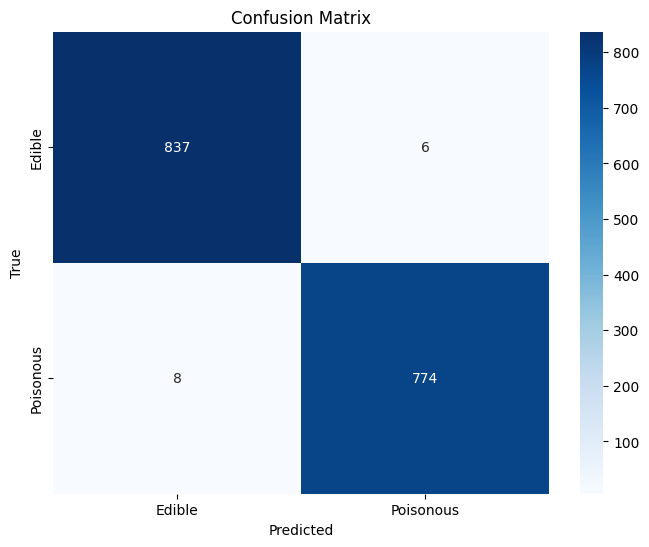

In [ ]:
from sklearn.metrics  import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))


print("confusion matrix")
print(cm)




plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

so sanh  voi thuat toan cua thu vien


In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score


model_lib = CategoricalNB()
model_lib.fit(X_train , y_train)
y_pred_lib = model_lib.predict(X_test)

print(f"Accuracy : { accuracy_score(y_test , y_pred_lib) * 100 } % " )


Accuracy : 95.07692307692308 % 


In [ ]:
predict_lib = model_lib.predict([test1])
print(f'lop duoc du doan la :  {"an duoc "  if predict_lib ==  1 else "khong an duoc"}')

lop duoc du doan la :  khong an duoc
